N = 314
Min =  0.006
Mean =  0.14627388535031846
Max =  0.304
Lilliefors Statistics=0.057, p=0.023
Kolmogorov-Smirnov Statistics=0.503, p=0.000
Shapiro-Wilk Statistics=0.985, p=0.003


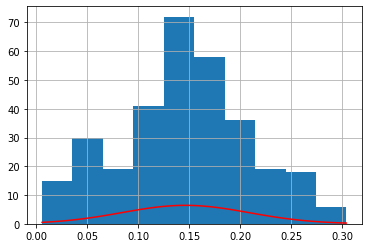

In [38]:
import numpy as np
from scipy.stats import shapiro, kstest, norm
from statsmodels.stats.diagnostic import lilliefors
import pandas as pd
import matplotlib.pyplot as plt

n = 90  # файлов сколько

a = np.empty((n, 0)).tolist()  # пустой массив из n подмассивов

for i in range(1, 91):  # числа из файлов в массив, затем в больший массив
    with open(str(i) + '.txt', encoding='windows-1251') as f:
        a[i-1] = [x for x in f.read().split('[')[1].split(']')[0].split()]
        a[i-1] = [float(x.replace(',', '.')) for x in a[i-1]]

for i in range(n):  # меняем элементы массива на расстояния между ними, 0.000
    for j in range(len(a[i])-1):
        a[i][j] = a[i][j+1] - a[i][j]
    a[i].pop()
    a[i] = [round(x, 3) for x in a[i]]

a = [item for sublist in a for item in sublist]
a.sort()  # отсортированный общий массив расстояний

print('N =', len(a))
print('Min = ', min(a))
print('Mean = ', np.mean(a))
print('Max = ', max(a))

ksstat, ksp = kstest(a, 'norm')
swstat, swp = shapiro(a)
lstat, lp = lilliefors(a)

print('Lilliefors', 'Statistics=%.3f, p=%.3f' % (lstat, lp))
print('Kolmogorov-Smirnov', 'Statistics=%.3f, p=%.3f' % (ksstat, ksp))
print('Shapiro-Wilk', 'Statistics=%.3f, p=%.3f' % (swstat, swp))

data = pd.Series(a)
data.hist()

x = np.linspace(min(a), max(a), 100)  # теоретическое норм. распределение
y = norm.pdf(x, np.mean(a), np.std(a))
plt.plot(x, y, color='red')

plt.show()
